In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import MicroTools as micro
from MicroTools import plot_tools as pt
import MiniTools as mini
import MicroTools.param_scan as param_scan

from importlib.resources import open_text


In [40]:
dic_osc_full = param_scan.load_scan_data('fit_data/MH_fullosc_3D_50.pkl')
dic_dec_full = param_scan.load_scan_data('fit_data/MH_decay_4D_30.pkl')

bf_osc_full = param_scan.get_best_fit_point(dic_osc_full)
bf_dec_full = param_scan.get_best_fit_point(dic_dec_full)

In [41]:
bf_dec_full

{'g': 3.039195382313198,
 'm4': 0.31622776601683794,
 'Ue4Sq': 0.20716573966075624,
 'Um4Sq': 0.1544426500964737,
 'sin2theta': 0.127981,
 'dm4SQR': 0.1,
 'MiniApp_chi2': 35.326818621185694,
 'MicroApp_chi2': 114.81965634304564,
 'MicroApp_Asimov_chi2': 15.540302026438336,
 'MiniApp_deltachi2': 0.0,
 'MicroApp_deltachi2': 24.84108307403018,
 'MicroApp_Asimov_deltachi2': 12.73117346682438}

In [21]:
params_no_osc = {'g': 1e-10, 'Ue4Sq': 1e-10, 'Um4Sq': 1e-10, 'm4': 1}
rates_no_osc = param_scan.get_nue_rates(params_no_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)

params_BEST_osc = {'g': 1e-5, 'Ue4Sq': 0.1, 'Um4Sq': 1e-2, 'm4': 1}
params_BEST_dec = {'g': 1, 'Ue4Sq': 0.1, 'Um4Sq': 3e-3, 'm4': 1e3}
rates_dic_osc_BEST = param_scan.get_nue_rates(params_BEST_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_BEST = param_scan.get_nue_rates(params_BEST_dec, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

params_solar_osc = {'g': 1e-3, 'Ue4Sq': 0.05, 'Um4Sq': 2e-2, 'm4': 1}
params_solar_dec = {'g': 1, 'Ue4Sq': 0.05, 'Um4Sq': 3e-3, 'm4': 1e3}
rates_dic_osc_solar = param_scan.get_nue_rates(params_solar_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_solar = param_scan.get_nue_rates(params_solar_dec, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

params_test = {'g': 1, 'Ue4Sq': 0.1, 'Um4Sq': 0.03, 'm4': 1000}
rates_dic_osc_test = param_scan.get_nue_rates(params_test, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_test = param_scan.get_nue_rates(params_test, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

rates_dic_bf_osc_full = param_scan.get_nue_rates(bf_osc_full, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_bf_dec_full = param_scan.get_nue_rates(bf_dec_full, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

## MiniBooNE nu_e sample

In [42]:
# settings for Mini Figs
TOTAL_RATE = False
INCLUDE_MB_LAST_BIN = False
STACKED = False
PLOT_FAMILY=False
PATH_PLOTS = 'plots/event_rates/'

PAPER_TAG = r'HKZ\,2024'

In [43]:
Weight_nue_flux = mini.apps.reweight_MC_to_nue_flux(
            param_scan.Etrue_nue, param_scan.Weight_nue, mode="fhc"
        )

MC_nue_bkg_intrinsic = np.dot(
                param_scan.fast_histogram(
                    param_scan.Etrue_nue, bins=param_scan.e_prod_e_int_bins, weights=Weight_nue_flux
                )[0],
                mini.apps.migration_matrix_official_bins_nue_11bins,
            )

In [7]:
len(rates_dic_osc_solar['MC_nue_app'])*2 + len(rates_dic_osc_solar['MC_numu_bkg_total_w_dis'])*2

NameError: name 'rates_dic_osc_solar' is not defined

In [44]:
import scipy
from scipy.stats import norm
def get_pval(rates_dic, ndof=8.7):
    MB_chi2 = mini.fit.chi2_MiniBooNE_combined(
                MC_nue_app=rates_dic["MC_nue_app"],
                MC_nuebar_app=rates_dic["MC_nuebar_app"],
                MC_nue_dis=rates_dic["MC_nue_bkg_total_w_dis"],
                MC_numu_dis=rates_dic["MC_numu_bkg_total_w_dis"],
                MC_nuebar_dis=rates_dic["MC_nuebar_bkg_total_w_dis"],
                MC_numubar_dis=rates_dic["MC_numubar_bkg_total_w_dis"],
                year="2020",
            )
    return scipy.stats.chi2.sf(MB_chi2, ndof)


def get_pval_nu(rates_dic, ndof=8.7):
    MB_chi2 = mini.fit.chi2_MiniBooNE_combined(
                MC_nue_app=rates_dic["MC_nue_app"],
                MC_nue_dis=rates_dic["MC_nue_bkg_total_w_dis"],
                MC_numu_dis=rates_dic["MC_numu_bkg_total_w_dis"],
                year="2020",
            )
    return scipy.stats.chi2.sf(MB_chi2, ndof)


# import the necessary module
# define the chi-square probability
pval, pval_nu = get_pval(rates_dic_osc_BEST, ndof=38 - 2), get_pval(rates_dic_decay_BEST, ndof=38/2 - 1)

# calculate the number of standard deviations # NOTE: lazy... I can't remember how to relate the two....
# std_devs, std_devs_nu = np.sqrt(scipy.stats.chi2.ppf(1-pval, 38-2)), np.sqrt(scipy.stats.chi2.ppf(1-pval_nu, 38/2-1))

print(pval, pval_nu)

0.025042806587038904 4.455963292007136e-05


In [34]:
def make_rate_plot(rates, params, name='3+1_osc'):
    fig, ax1 = pt.std_fig(figsize=(3.3*1.2,2.3*1.2))
    bins = param_scan.MB_Ereco_official_bins
    bin_w = np.diff(bins)
    bin_c = bins[:-1] + bin_w/2

    ######################################
    # MiniBooNE 
    if TOTAL_RATE:
        units= 1
        ax1.set_ylabel(r"Events")
    else:
        units = 1/micro.bin_width
        ax1.set_ylabel(r"Events/MeV")

    nue_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_nuedata_lowe.txt",
        )
    )
    nue_tot_bkg = np.genfromtxt(
                open_text(
                    f"MiniTools.include.MB_data_release_2020.combined",
                    f"miniboone_nuebgr_lowe.txt",
                )
            )
    nue_bkg_midID = nue_tot_bkg - MC_nue_bkg_intrinsic

    # plot data
    pt.data_plot(ax1, 
            X=bin_c,
            Y=nue_data*units, 
            xerr=bin_w/2, 
            yerr=np.sqrt(nue_data)*units,
            zorder=3)


    ax1.hist(bins[:-1],
            bins=bins,
            weights=(nue_tot_bkg)*units,
            edgecolor='black',
            lw=0.5,
            ls=(1,(2,1)),
            label=r'unoscillated total bkg',
            histtype='step',
            zorder=1.6)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(nue_bkg_midID)*units,
            edgecolor='black',
            facecolor='lightgrey',
            lw=0.5,
            label=r'misID bkg',
            histtype='stepfilled',
            zorder=2)
    ax1.hist(bins[:-1],
            bins=bins,
            # weights=(nue_tot_bkg)*units,
            weights=rates['MC_nue_bkg_total_w_dis']*units,
            edgecolor='black',
            facecolor='peachpuff',
            lw=0.5,
            label=r'$\nu_e$ disappearance',
            histtype='stepfilled',
            zorder=1.6)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(rates['MC_nue_app'] + rates['MC_nue_bkg_total_w_dis'])*units,
            # weights=(rates_dic_osc['MC_nue_app'] + nue_tot_bkg)*units,
            edgecolor='black',
            facecolor='lightblue',
            lw=0.5,
            linestyle=(1,(3,0)),
            label=r'$\nu_\mu \to \nu_e$ appearance',
            histtype='stepfilled',
            zorder=1.5)



    ax1.legend(fontsize=8, markerfirst=False, ncol=1)
    pval = r'$p_{\rm val}$'
    pval_str = fr'{pval} $\,= {get_pval(rates, 38-5)*100:.1f}\%$'
    #ax1.annotate(text=r'MiniBooNE FHC 2020 -- '+ pval_str, xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
    ax1.annotate(text=r'MiniBooNE FHC 2020', xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
    ax1.annotate(text=rf'\noindent $g_\varphi = {params["g"]:.1f}$\\$m_4 = {params["m4"]:.0f}$ eV\\$|U_{{e4}}|^2 = {params["Ue4Sq"]:.2f}$\\$|U_{{\mu 4}}|^2 = {params["Um4Sq"]:.3f}$', 
                 xy=(0.72,0.45), 
                 xycoords='axes fraction', 
                 fontsize=8.5,
                 bbox=dict(facecolor='none', edgecolor='black', linewidth=0.5, boxstyle='square,pad=0.3'))
    ax1.set_xlabel(r"Reconstructed $E_\nu^{\rm QE}$ (GeV)", fontsize=9, labelpad=2.5)
    if INCLUDE_MB_LAST_BIN:
        ax1.set_xticks([0.2,0.5,1,1.5,2,2.5,3])
        ax1.set_xlim(0.2,3)
    else:
        ax1.set_xticks([0.2,0.4,0.6,0.8,1,1.2,1.4])
        ax1.set_xlim(0.2,1.5)
    ax1.set_ylim(0,8)
    # ax1.xaxis.set_major_locator(pt.MultipleLocator(0.5))
    # ax1.xaxis.set_minor_locator(pt.MultipleLocator(0.1))
    #print(rates['MC_nue_bkg_total_w_dis'])

    ax1.annotate(text=PAPER_TAG, xy=(1,1.025), xycoords='axes fraction', fontsize=8.5, ha='right')
    # ax1.annotate(text=fr'{pval} $\,= {get_pval(rates, 38-5)*100:.1f}\%$', xy=(0.15,0.9), xycoords='axes fraction', fontsize=8.5)
    # fig.savefig(f"{PATH_PLOTS}/Mini_{name}.png", dpi=400)
    fig.savefig(f"{PATH_PLOTS}/Mini_{name}.pdf", dpi=400)

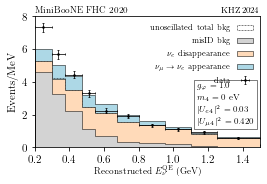

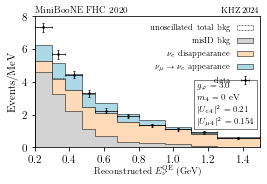

In [29]:
make_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
make_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

#make_numu_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
#make_numu_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

#make_micro_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
#make_micro_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

#make_micro_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf', PC=True)
#make_micro_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf', PC=True)

In [17]:
params_test = {'g': 1000, 'Ue4Sq': 0.5, 'Um4Sq': 0.03, 'm4': 1}
rates_dic_osc_test = param_scan.get_nue_rates(params_test, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_test = param_scan.get_nue_rates(params_test, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

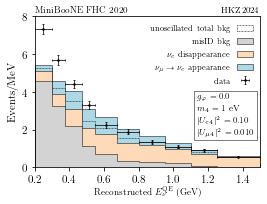

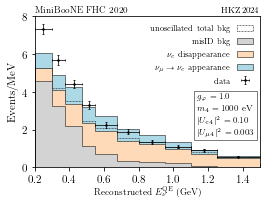

In [35]:
make_rate_plot(rates_dic_osc_BEST, params_BEST_osc, '3+1_osc_test')
make_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_test')

#make_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
#make_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_solar')

In [27]:
def make_numu_rate_plot(rates, params, name='3+1_osc'):
    fig, ax1 = pt.std_fig(figsize=(3.3*1.2,2*1.2))
    bins = param_scan.MB_Ereco_official_bins_numu
    bin_w = np.diff(bins)
    bin_c = bins[:-1] + bin_w/2

    ######################################
    # MiniBooNE 
    if TOTAL_RATE:
        units= 1
        ax1.set_ylabel(r"Events")
    else:
        units = 1/bin_w/1e3
        ax1.set_ylabel(r"Events/MeV")

    numu_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_numudata.txt",
        )
    )
    numu_tot_bkg = np.genfromtxt(
                open_text(
                    f"MiniTools.include.MB_data_release_2020.combined",
                    f"miniboone_numu.txt",
                )
            )

    # plot data
    pt.data_plot(ax1, 
            X=bin_c,
            Y=numu_data*units, 
            xerr=bin_w/2, 
            yerr=np.sqrt(numu_data)*units,
            zorder=3)


    ax1.hist(bins[:-1],
            bins=bins,
            weights=(numu_tot_bkg)*units,
            edgecolor='black',
            lw=0.5,
            ls=(1,(2,1)),
            label=r'unoscillated total bkg',
            histtype='step',
            zorder=1.6)
    
    ax1.hist(bins[:-1],
            bins=bins,
            weights=rates['MC_numu_bkg_total_w_dis']*units,
            edgecolor='black',
            facecolor='thistle',
            lw=0.5,
            label=r'$\nu_\mu$ w/ disappearance',
            histtype='stepfilled',
            zorder=1.6)


    ax1.legend(fontsize=8, markerfirst=False, ncol=1)
    ax1.annotate(text=r'MiniBooNE FHC 2020', xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
    ax1.annotate(text=rf'\noindent $g_\varphi = {params["g"]:.1f}$\\$m_4 = {params["m4"]:.0f}$ eV\\$|U_{{e4}}|^2 = {params["Ue4Sq"]:.2f}$\\$|U_{{\mu 4}}|^2 = {params["Um4Sq"]:.3f}$', 
                 xy=(0.72,0.6), 
                 xycoords='axes fraction', 
                 fontsize=8.5,
                 bbox=dict(facecolor='none', edgecolor='black', linewidth=0.5, boxstyle='square,pad=0.3'))
    ax1.set_xlabel(r"Reconstructed $E_\nu^{\rm QE}$ (GeV)", fontsize=9, labelpad=2.5)
    ax1.set_xticks([0,0.5,1.0,1.5,1.9])
    ax1.set_xlim(0.0,1.9)
    ax1.set_ylim(0,500)

    ax1.annotate(text=PAPER_TAG, xy=(1,1.025), xycoords='axes fraction', fontsize=8.5, ha='right')

    # fig.savefig(f"{PATH_PLOTS}/Mini_{name}_numu.png", dpi=400)
    #fig.savefig(f"{PATH_PLOTS}/Mini_{name}_numu.pdf", dpi=400)

/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_8347/1339146044.py:17: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_8347/1339146044.py:23: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  open_text(


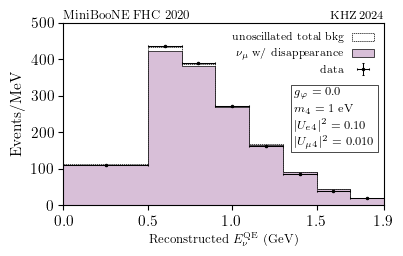

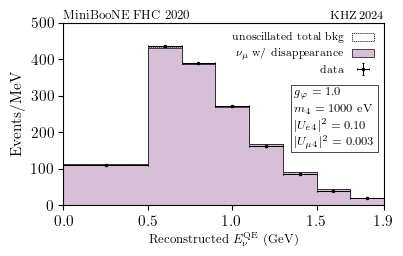

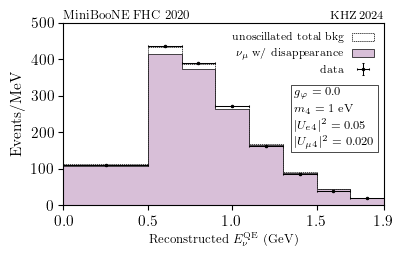

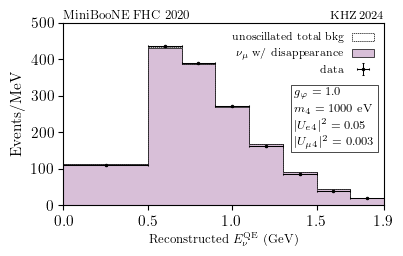

In [42]:
make_numu_rate_plot(rates_dic_osc_BEST, params_BEST_osc, '3+1_osc_BEST')
make_numu_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST')

make_numu_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
make_numu_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_solar')

## Compare oscillation disappearance and decay regeneration in MiniBooNE event rate

yes


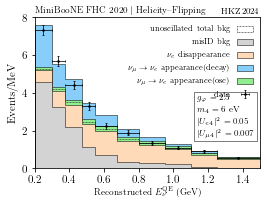

In [92]:
import MicroTools.param_scan as param_scan
name = 'app_decay_vs_osc'
params = {'g': 2.5, 'Ue4Sq': 0.05, 'Um4Sq': 0.007, 'm4': 5.6}
rates_dic_decay_test = param_scan.get_nue_rates(params, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=True, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False, helicity='flipping')
rates_dic_osc_test = param_scan.get_nue_rates(params, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=True, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False, helicity = 'flipping')
if 'MC_nue_app_for_unfolding' in rates_dic_decay_test:
    print('yes')
else:
    print('no')
fig, ax1 = pt.std_fig(figsize=(3.3*1.2,2.3*1.2))
bins = param_scan.MB_Ereco_official_bins
bin_w = np.diff(bins)
bin_c = bins[:-1] + bin_w/2

######################################
# MiniBooNE 
if TOTAL_RATE:
    units= 1
    ax1.set_ylabel(r"Events")
else:
    units = 1/micro.bin_width
    ax1.set_ylabel(r"Events/MeV")

nue_data = np.genfromtxt(
    open_text(
        f"MiniTools.include.MB_data_release_2020.combined",
        f"miniboone_nuedata_lowe.txt",
    )
)
nue_tot_bkg = np.genfromtxt(
            open_text(
                f"MiniTools.include.MB_data_release_2020.combined",
                f"miniboone_nuebgr_lowe.txt",
            )
        )
nue_bkg_midID = nue_tot_bkg - MC_nue_bkg_intrinsic

# plot data
pt.data_plot(ax1, 
        X=bin_c,
        Y=nue_data*units, 
        xerr=bin_w/2, 
        yerr=np.sqrt(nue_data)*units,
        zorder=3)

#ax1.hist(bins[:-1],
        #bins=bins,
        ## weights=(nue_tot_bkg)*units,
        #weights=rates_dic_decay_test['MC_nue_bkg_total_w_dis']*units,
        #edgecolor='black',
        #facecolor='lightskyblue',
        #lw=0.5,
        #label=r'$\nu_e$ regeneration',
        #histtype='stepfilled',
        #zorder=1.6)
ax1.hist(bins[:-1],
        bins=bins,
        weights=(nue_tot_bkg)*units,
        edgecolor='black',
        lw=0.5,
        ls=(1,(2,1)),
        label=r'unoscillated total bkg',
        histtype='step',
        zorder=1.6)
ax1.hist(bins[:-1],
        bins=bins,
        weights=(nue_bkg_midID)*units,
        edgecolor='black',
        facecolor='lightgrey',
        lw=0.5,
        label=r'misID bkg',
        histtype='stepfilled',
        zorder=2)
ax1.hist(bins[:-1],
        bins=bins,
        # weights=(nue_tot_bkg)*units,
        weights=rates_dic_osc_test['MC_nue_bkg_total_w_dis']*units,
        edgecolor='black',
        facecolor='peachpuff',
        lw=0.5,
        label=r'$\nu_e$ disappearance',
        histtype='stepfilled',
        zorder=1.6)
ax1.hist(bins[:-1],
        bins=bins,
        weights=(rates_dic_decay_test['MC_nue_app'] + rates_dic_decay_test['MC_nue_bkg_total_w_dis'])*units,
        # weights=(rates_dic_osc['MC_nue_app'] + nue_tot_bkg)*units,
        edgecolor='black',
        facecolor='lightskyblue',
        lw=0.5,
        linestyle=(1,(3,0)),
        label=r'$\nu_\mu \to \nu_e$ appearance(decay)',
        histtype='stepfilled',
        zorder=1.5)
ax1.hist(bins[:-1],
        bins=bins,
        weights=(rates_dic_osc_test['MC_nue_app'] + rates_dic_decay_test['MC_nue_bkg_total_w_dis'])*units,
        # weights=(rates_dic_osc['MC_nue_app'] + nue_tot_bkg)*units,
        edgecolor='black',
        facecolor='lightgreen',
        lw=0.5,
        linestyle=(1,(3,0)),
        label=r'$\nu_\mu \to \nu_e$ appearance(osc)',
        histtype='stepfilled',
        zorder=1.5)


ax1.legend(fontsize=8, markerfirst=False, ncol=1)
pval = r'$p_{\rm val}$'
#pval_str = fr'{pval} $\,= {get_pval(rates_dic_decay_test, 38-5)*100:.1f}\%$'
ax1.annotate(text=r'MiniBooNE FHC 2020 $\vert$ Helicity--Flipping', xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
ax1.annotate(text=rf'\noindent $g_\varphi = {params["g"]:.1f}$\\$m_4 = {params["m4"]:.0f}$ eV\\$|U_{{e4}}|^2 = {params["Ue4Sq"]:.2f}$\\$|U_{{\mu 4}}|^2 = {params["Um4Sq"]:.3f}$', 
                xy=(0.72,0.45), 
                xycoords='axes fraction', 
                fontsize=8.5,
                bbox=dict(facecolor='none', edgecolor='black', linewidth=0.5, boxstyle='square,pad=0.3'))
ax1.set_xlabel(r"Reconstructed $E_\nu^{\rm QE}$ (GeV)", fontsize=9, labelpad=2.5)
if INCLUDE_MB_LAST_BIN:
    ax1.set_xticks([0.2,0.5,1,1.5,2,2.5,3])
    ax1.set_xlim(0.2,3)
else:
    ax1.set_xticks([0.2,0.4,0.6,0.8,1,1.2,1.4])
    ax1.set_xlim(0.2,1.5)
ax1.set_ylim(0,8)
# ax1.xaxis.set_major_locator(pt.MultipleLocator(0.5))
# ax1.xaxis.set_minor_locator(pt.MultipleLocator(0.1))

ax1.annotate(text=PAPER_TAG, xy=(1,1.025), xycoords='axes fraction', fontsize=8.5, ha='right')
# ax1.annotate(text=fr'{pval} $\,= {get_pval(rates, 38-5)*100:.1f}\%$', xy=(0.15,0.9), xycoords='axes fraction', fontsize=8.5)
# fig.savefig(f"{PATH_PLOTS}/Mini_{name}.png", dpi=400)
fig.savefig(f"{PATH_PLOTS}/Mini_{name}_flipping.pdf", dpi=400)

## MicroBooNE Rates

In [45]:
from MicroTools.InclusiveTools.inclusive_osc_tools import (
    Decay_muB_OscChi2,
    DecayMuBNuMuDis,
    DecayMuBNuEDis,
)

In [79]:
import copy
def make_micro_rate_plot(rates_dec, rates_osc, params, name='micro_3+1_osc', PC=False, helicity = 'conserving'):
    fig, ax1 = pt.std_fig(figsize=(3.3*1.2,2.3*1.2))

    bins = np.array([0.0 + 0.1 * j for j in range(26)] + [10.0])
    bin_w = np.diff(bins)
    bin_c = bins[:-1] + bin_w/2



    # MicroBooNE fully inclusive signal by unfolding MiniBooNE Signal
    uBFC_dec = param_scan.GBFC.miniToMicro(rates_dec["MC_nue_app_for_unfolding"])
    uBFC_dec = np.insert(uBFC_dec, 0, [0.0])
    uBFC_dec = np.append(uBFC_dec, 0.0)

    # MicroBooNE partially inclusive signal by unfolding MiniBooNE Signal
    MC_nue_app_for_unfolding2_dec = copy.deepcopy(rates_dec["MC_nue_app_for_unfolding"])
    uBPC_dec = param_scan.GBPC.miniToMicro(MC_nue_app_for_unfolding2_dec)
    uBPC_dec = np.insert(uBPC_dec, 0, [0.0])
    uBPC_dec = np.append(uBPC_dec, 0.0)

    uBtemp_dec = np.concatenate([uBFC_dec, uBPC_dec, np.zeros(85)])

    uB_signal_regen = uBPC_dec if PC else uBFC_dec


    # oscillation only MicroBooNE fully inclusive signal by unfolding MiniBooNE Signal
    uBFC_osc = param_scan.GBFC.miniToMicro(rates_osc["MC_nue_app_for_unfolding"])
    uBFC_osc = np.insert(uBFC_osc, 0, [0.0])
    uBFC_osc = np.append(uBFC_osc, 0.0)

    # MicroBooNE partially inclusive signal by unfolding MiniBooNE Signal
    MC_nue_app_for_unfolding2_osc = copy.deepcopy(rates_osc["MC_nue_app_for_unfolding"])
    uBPC_osc = param_scan.GBPC.miniToMicro(MC_nue_app_for_unfolding2_osc)
    uBPC_osc = np.insert(uBPC_osc, 0, [0.0])
    uBPC_osc = np.append(uBPC_osc, 0.0)

    uBtemp_osc = np.concatenate([uBFC_osc, uBPC_osc, np.zeros(85)])

    uB_signal_osc = uBPC_osc if PC else uBFC_osc

#     unfolding = micro.unfolder.MBtomuB(
#     analysis="1eX_PC" if PC else "1eX",
#     remove_high_energy=False,
#     unfold=True,
#     effNoUnfold=True,
#     which_template="2020",
#     )

    # MicroBooNE fully inclusive signal by unfolding MiniBooNE Signal
#     uB_signal = unfolding.miniToMicro(rates["MC_nue_app_for_unfolding"])
#     uB_signal = np.insert(uB_signal, 0, [0.0])
#     uB_signal = np.append(uB_signal, 0.0)

    SAMPLE = "PC" if PC else "FC"
    other_bkg = np.load(micro.muB_inclusive_datarelease_path + f'nueCC_{SAMPLE}_Bkg.npy')
    intrinsic_bkg = np.load(micro.muB_inclusive_datarelease_path + f'nueCC_{SAMPLE}_Sig.npy')
    data = np.load(micro.muB_inclusive_datarelease_path + f'nueCC_{SAMPLE}_Obs.npy')

    # \nu_e disappearance signal replacement (oscillation term -- lightgreen)
    NuEReps = DecayMuBNuEDis(
    params,
    oscillations=True,
    decay=False,
    decouple_decay=False,
    disappearance=True,
    energy_degradation=True,
    helicity=helicity,
    )

    # \nu_e disappearance signal replacement (include regeneration term -- lightskyblue)
    NuERepsRegen = DecayMuBNuEDis(
    params,
    oscillations=True,
    decay=True,
    decouple_decay=False,
    disappearance=True,
    energy_degradation=True,
    helicity=helicity,
    )

    NuERepsOsc = DecayMuBNuEDis(
        params,
        oscillations=True,
        decay=False,
        decouple_decay=False,
        disappearance=True,
        energy_degradation=True,
        helicity=helicity,
    )

    # \nu_mu disappearance signal replacement
    
    NuMuReps = DecayMuBNuEDis(
    params,
    oscillations=True,
    decay=True,
    decouple_decay=False,
    disappearance=True,
    energy_degradation=True,
    helicity=helicity,
    )

    # MicroBooNE
    MuB_chi2 = Decay_muB_OscChi2(
        params,
        uBtemp_dec,
        constrained=False,
        sigReps=[NuEReps[0], NuEReps[1], NuMuReps[0], NuMuReps[1], None, None, None],
        RemoveOverflow=True,
        oscillations=True,
        decay=True,
        decouple_decay=False,
        disappearance=True,
        energy_degradation=True,
        helicity=helicity,
    )

    ###################################### 
    if TOTAL_RATE:
        units= 1
        ax1.set_ylabel(r"Events")
    else:
        units = 1/bin_w/1e3
        ax1.set_ylabel(r"Events/MeV")

    # plot data
    pt.data_plot(ax1, 
            X=bin_c,
            Y=data*units, 
            xerr=bin_w/2, 
            yerr=np.sqrt(data)*units,
            zorder=3)

    #ax1.hist(bins[:-1],
            #bins=bins,
            #weights=(other_bkg+NuERepsRegen[1 if PC else 0])*units,
            #edgecolor='black',
            #facecolor='lightskyblue',
            #lw=0.5,
            #label=r'$\nu_e$ regeneration',
            #histtype='stepfilled',
            #zorder=1.6)    
    
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(other_bkg + intrinsic_bkg)*units,
            edgecolor='black',
            lw=0.5,
            ls=(1,(2,1)),
            label=r'unoscillated total bkg',
            histtype='step',
            zorder=1.8)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=other_bkg*units,
            edgecolor='black',
            facecolor='lightgrey',
            lw=0.5,
            label=r'Non-$\nu_e$ bkg',
            histtype='stepfilled',
            zorder=1.7)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(other_bkg+NuEReps[1 if PC else 0])*units,
            edgecolor='black',
            facecolor='peachpuff',
            lw=0.5,
            label=r'$\nu_e$ disappearance',
            histtype='stepfilled',
            zorder=1.6)
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(other_bkg+uB_signal_regen+NuERepsRegen[1 if PC else 0])*units,
            edgecolor='black',
            facecolor='lightskyblue',
            lw=0.5,
            label=r'$\nu_e$ appearance(decay)',
            histtype='stepfilled',
            zorder=1.4)    
    ax1.hist(bins[:-1],
            bins=bins,
            weights=(other_bkg+uB_signal_osc+NuERepsRegen[1 if PC else 0])*units,
            edgecolor='black',
            facecolor='lightgreen',
            lw=0.5,
            label=r'$\nu_e$ appearance(osc)',
            histtype='stepfilled',
            zorder=1.4)

    ax1.legend(loc='upper right', fontsize=8, markerfirst=False, ncol=1)
    ax1.annotate(text=fr'MicroBooNE {"PC" if PC else "FC"} 2020 $\vert$ {"Helicity--Flipping" if helicity == "flipping" else ""}', xy=(0.0,1.025), xycoords='axes fraction', fontsize=9)
    ax1.annotate(text=rf'\noindent $g_\varphi = {params["g"]:.1f},\, m_4 = {params["m4"]:.0f}$ eV\\$|U_{{e4}}|^2 = {params["Ue4Sq"]:.2f}\\|U_{{\mu 4}}|^2 = {params["Um4Sq"]:.3f}$', 
                 xy=(0.025,0.91), 
                 xycoords='axes fraction', 
                 fontsize=8.5,
                 bbox=dict(facecolor='none', edgecolor='black', linewidth=0.5, boxstyle='square,pad=0.3'))

    ax1.set_xlabel(r"Reconstructed $E_\nu^{\rm QE}$ (GeV)", fontsize=9, labelpad=2.5)
    ax1.set_xticks([0,0.5,1.0,1.5,2.0, 2.5])
    ax1.set_xlim(0.0,2.5)
    ax1.set_ylim(0,0.3 if PC else 0.5)

    ax1.annotate(text=PAPER_TAG, xy=(1,1.025), xycoords='axes fraction', fontsize=8.5, ha='right')

#     fig.savefig(f"{PATH_PLOTS}/Micro_{name}_{'PC' if PC else 'FC'}.png", dpi=400)
    fig.savefig(f"{PATH_PLOTS}/Micro_{name}_{'PC' if PC else 'FC'}.pdf", dpi=400)

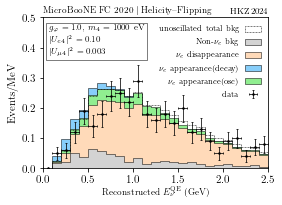

In [80]:
params_test = {'g': 1, 'Ue4Sq': 0.1, 'Um4Sq': 0.003, 'm4': 1000}
rates_dic_decay_test = param_scan.get_nue_rates(params_test, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False, helicity='flipping')
rates_dic_osc_test = param_scan.get_nue_rates(params_test, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False, helicity='flipping')
make_micro_rate_plot(rates_dic_decay_test, rates_dic_osc_test, params_test, 'app_dec_vs_osc_HF', helicity='flipping') 

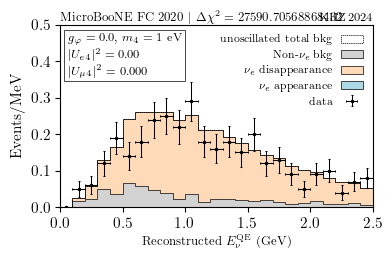

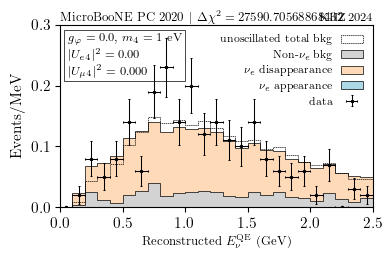

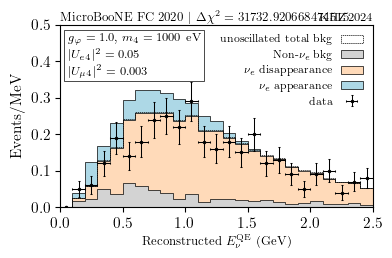

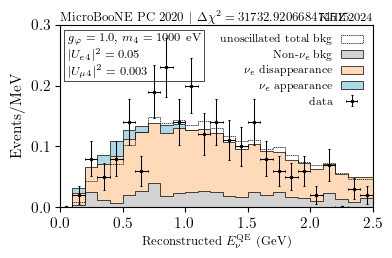

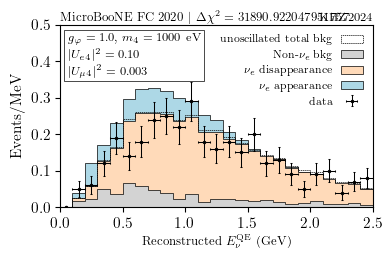

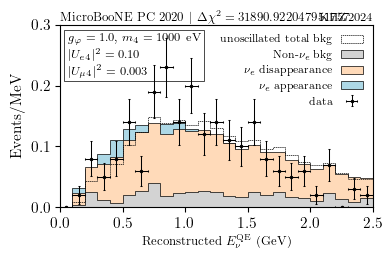

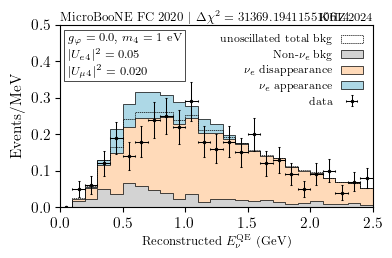

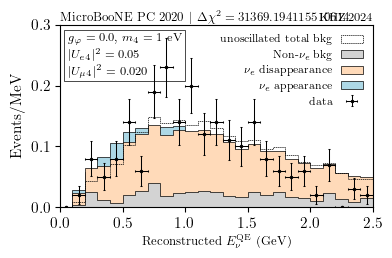

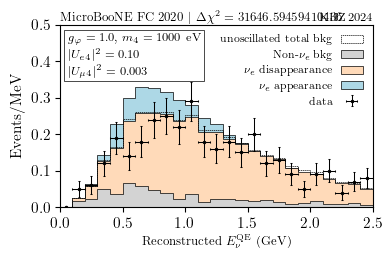

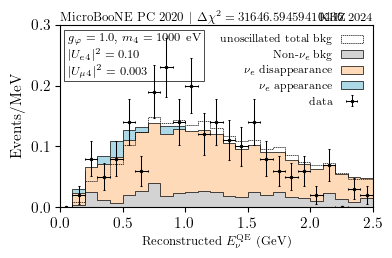

In [53]:
make_micro_rate_plot(rates_no_osc, params_no_osc, 'No osc')
make_micro_rate_plot(rates_no_osc, params_no_osc, 'No osc', PC=True)

make_micro_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_BEST')
make_micro_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_BEST', PC=True)

make_micro_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST')
make_micro_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST', PC=True)

make_micro_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
make_micro_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar', PC=True)

make_micro_rate_plot(rates_dic_osc_BEST, params_BEST_dec, '3+1_osc_BEST')
make_micro_rate_plot(rates_dic_osc_BEST, params_BEST_dec, '3+1_osc_BEST', PC=True)